# CP 322 - Final Project

Aditya Chauhan (169027493)

## Introduction

### Dataset Choice

- [Student Performance Dataset](https://archive.ics.uci.edu/dataset/320/student+performance)

### Business Understanding

Key Research Questions:

- What are the most significant factors influencing students' final grades (G3)
- How does early academic performance (G1 & G2) correlate with final outcomes (G3)
- Can external factors such as familial support, alcohol consumption, and absences, predict student's academic success?

### Imports

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, LabelEncoder
import seaborn as sns
from scipy.stats import zscore

### Read/Load Data

In [16]:
# Load the datasets
student_mat = pd.read_csv("Data/student-mat.csv", sep=";")
student_por = pd.read_csv("Data/student-por.csv", sep=";")

# Merge datasets on specified columns
merge_columns = [
    "school", "sex", "age", "address", "famsize", "Pstatus", 
    "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"
]
merged_data = pd.merge(student_mat, student_por, on=merge_columns, suffixes=('_mat', '_por'))

# Save the merged dataset
merged_data.to_csv("student-merged.csv", index=False)
print("Number of students in merged dataset:", merged_data.shape[0])
print("Merged dataset saved to 'student-merged.csv'.")

Number of students in merged dataset: 382
Merged dataset saved to 'student-merged.csv'.


## Data Quality Report

### Objective & Use Case

Student success is a cornerstone of educational systems, and identifying the drivers of academic performance is critical for improving outcomes. This project utilizes the Student Performance Dataset to develop a predictive model that analyzes the factors affecting final grades (G3). By addressing key questions—like the importance of early grades (G1, G2), the role of family support, and the impact of behavioral factors—this model provides practical tools for educators and administrators to allocate resources effectively and support at-risk students.

### Tabular Summary

In [17]:
def generate_tabular_summary(df):
    """
    Generate a tabular summary for the dataset with key statistics.
    
    Parameters:
    - df: pandas DataFrame, the dataset to summarize.
    
    Returns:
    - summary: pandas DataFrame with feature-wise statistics.
    """
    summary = pd.DataFrame({
        "Column Name": df.columns,
        "Data Type": df.dtypes.values,
        "Number of Unique Values": df.nunique().values,
        "Number of Missing Values": df.isnull().sum().values,
        "Percentage of Missing Values (%)": (df.isnull().sum() / len(df) * 100).values,
        "Mean": [df[col].mean() if df[col].dtype in ['int64', 'float64'] else None for col in df.columns],
        "Median": [df[col].median() if df[col].dtype in ['int64', 'float64'] else None for col in df.columns],
        "Standard Deviation": [df[col].std() if df[col].dtype in ['int64', 'float64'] else None for col in df.columns],
        "Minimum": [df[col].min() if df[col].dtype in ['int64', 'float64'] else None for col in df.columns],
        "Maximum": [df[col].max() if df[col].dtype in ['int64', 'float64'] else None for col in df.columns],
        "Top Value (Mode)": [df[col].mode()[0] if not df[col].mode().empty else None for col in df.columns],
        "Frequency of Top Value": [df[col].value_counts().iloc[0] if not df[col].value_counts().empty else None for col in df.columns]
    })
    return summary

# Generate the tabular summary
tabular_summary = generate_tabular_summary(merged_data)

# Save the summary to a CSV file
tabular_summary.to_csv("tabular_summary.csv", index=False)
print("Tabular summary saved to 'tabular_summary.csv'.")

# Display the summary
tabular_summary

Tabular summary saved to 'tabular_summary.csv'.


,Column Name,Data Type,Number of Unique Values,Number of Missing Values,Percentage of Missing Values (%),Mean,Median,Standard Deviation,Minimum,Maximum,Top Value (Mode),Frequency of Top Value
0,school,object,2,0,0.0,NaN,NaN,NaN,NaN,NaN,GP,342
1,sex,object,2,0,0.0,NaN,NaN,NaN,NaN,NaN,F,198
2,age,int64,7,0,0.0,16.586387,17.0,1.173470,15.0,22.0,16,107
3,address,object,2,0,0.0,NaN,NaN,NaN,NaN,NaN,U,301
4,famsize,object,2,0,0.0,NaN,NaN,NaN,NaN,NaN,GT3,278
5,Pstatus,object,2,0,0.0,NaN,NaN,NaN,NaN,NaN,T,344
6,Medu,int64,5,0,0.0,2.806283,3.0,1.086381,0.0,4.0,4,135
7,Fedu,int64,5,0,0.0,2.565445,3.0,1.096240,0.0,4.0,2,105
8,Mjob,object,5,0,0.0,NaN,NaN,NaN,NaN,NaN,other,138
9,Fjob,object,5,0,0.0,NaN,NaN,NaN,NaN,NaN,other,211


Data Quality Report saved as 'data_quality_report.csv'.

Outlier Counts per Numeric Feature:
{'age': np.int64(1), 'Medu': np.int64(0), 'Fedu': np.int64(0), 'traveltime_mat': np.int64(8), 'studytime_mat': np.int64(0), 'failures_mat': np.int64(17), 'famrel_mat': np.int64(9), 'freetime_mat': np.int64(0), 'goout_mat': np.int64(0), 'Dalc_mat': np.int64(9), 'Walc_mat': np.int64(0), 'health_mat': np.int64(0), 'absences_mat': np.int64(4), 'G1_mat': np.int64(0), 'G2_mat': np.int64(0), 'G3_mat': np.int64(0), 'traveltime_por': np.int64(8), 'studytime_por': np.int64(0), 'failures_por': np.int64(13), 'famrel_por': np.int64(8), 'freetime_por': np.int64(0), 'goout_por': np.int64(0), 'Dalc_por': np.int64(9), 'Walc_por': np.int64(0), 'health_por': np.int64(0), 'absences_por': np.int64(6), 'G1_por': np.int64(1), 'G2_por': np.int64(0), 'G3_por': np.int64(6)}


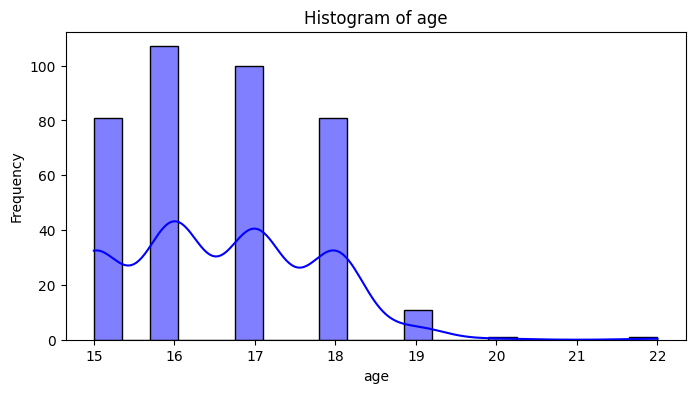

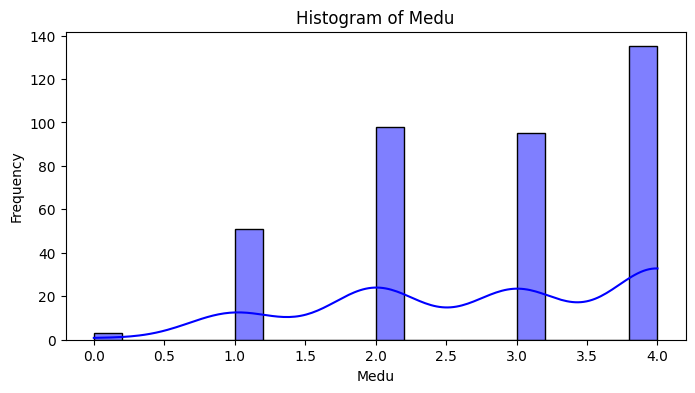

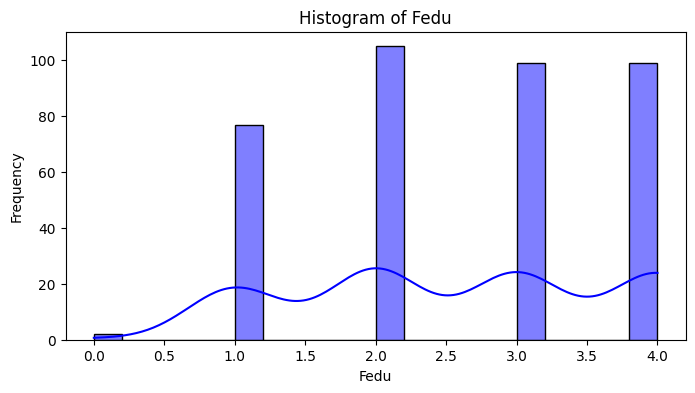

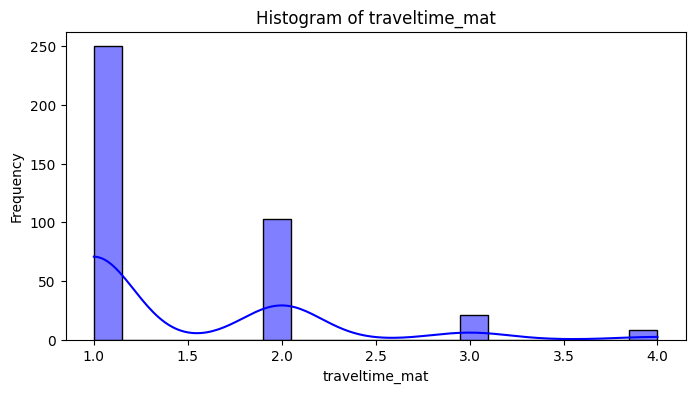

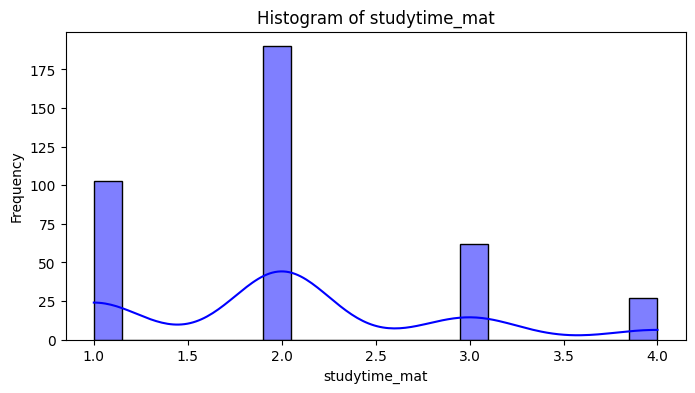

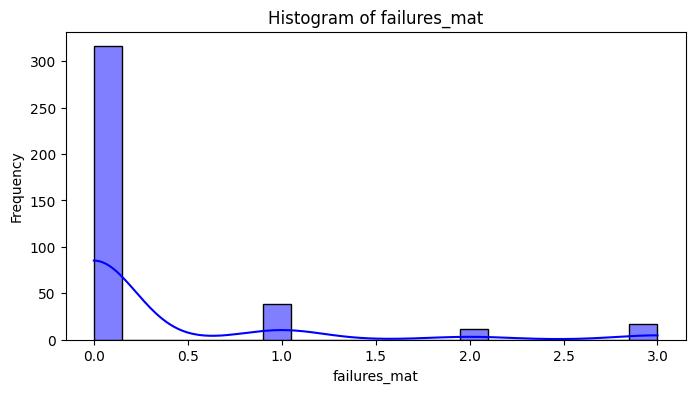

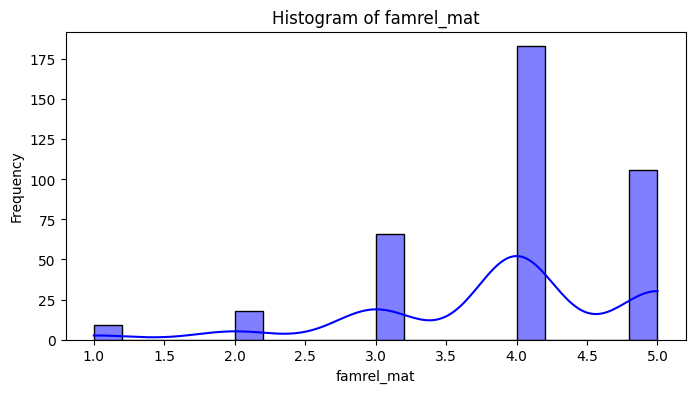

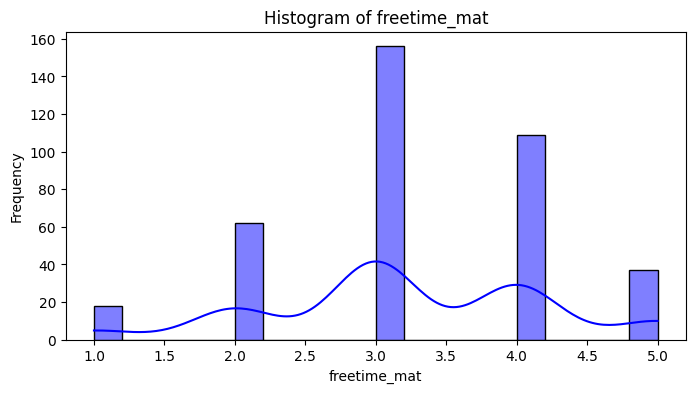

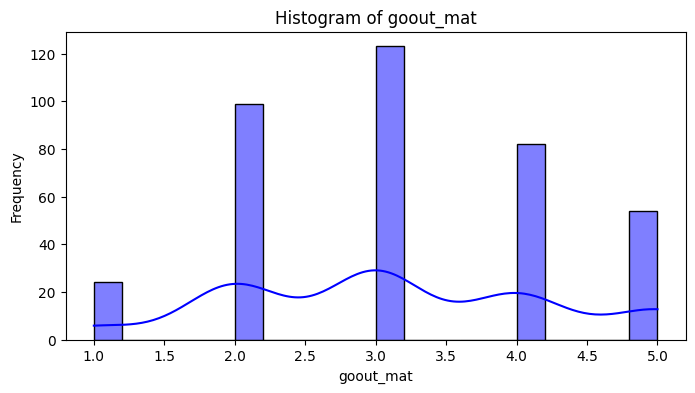

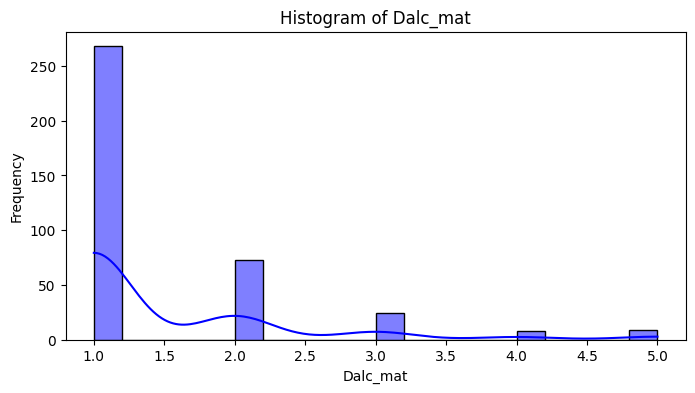

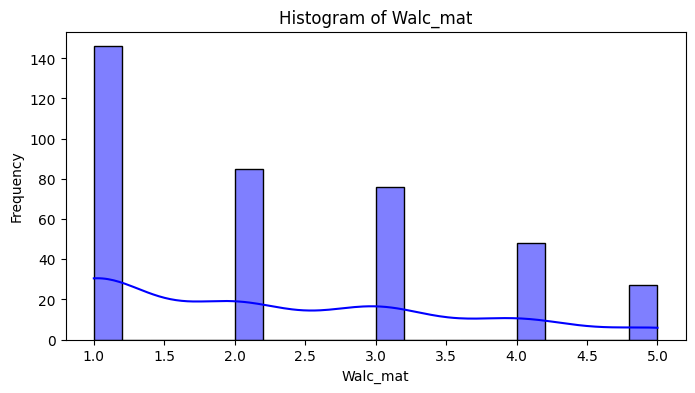

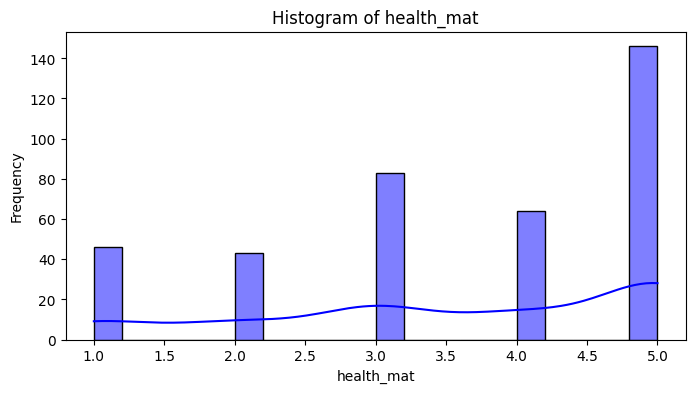

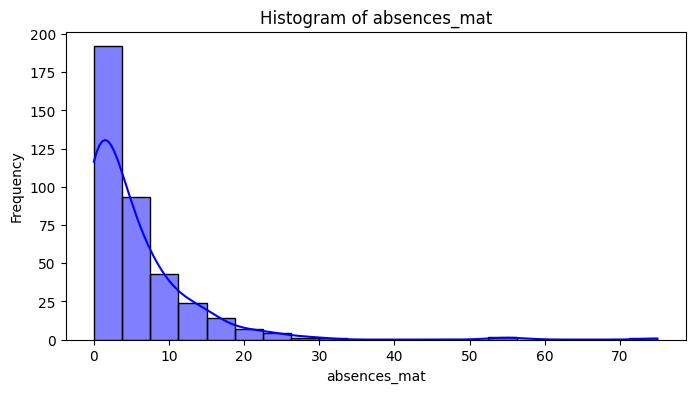

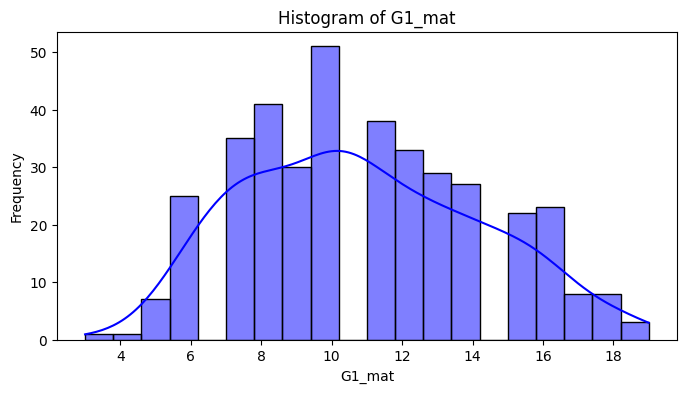

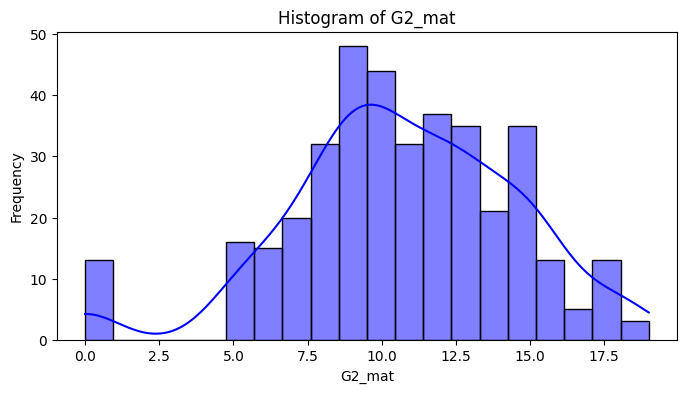

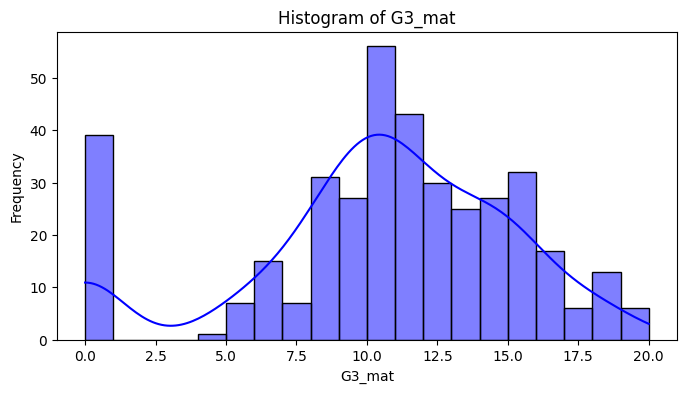

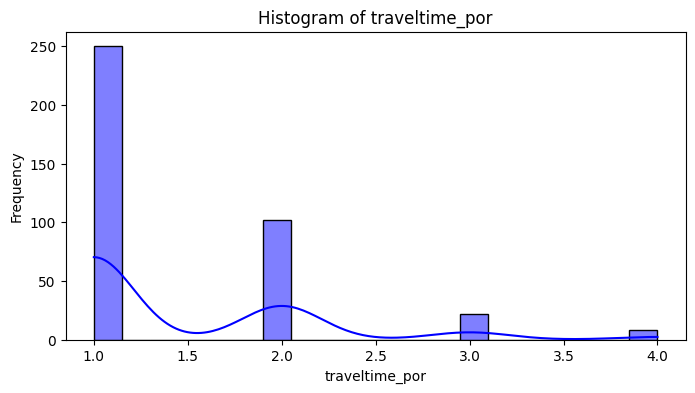

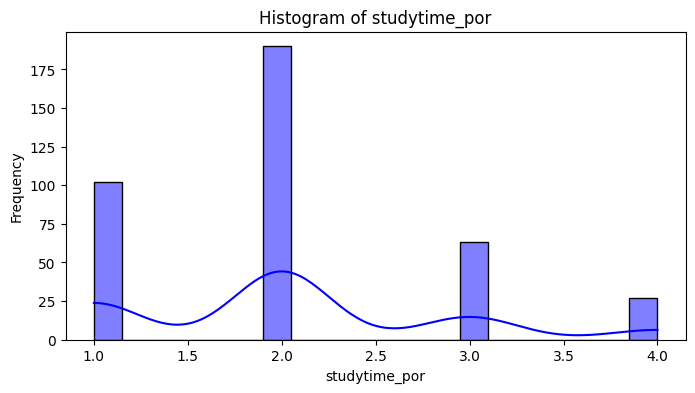

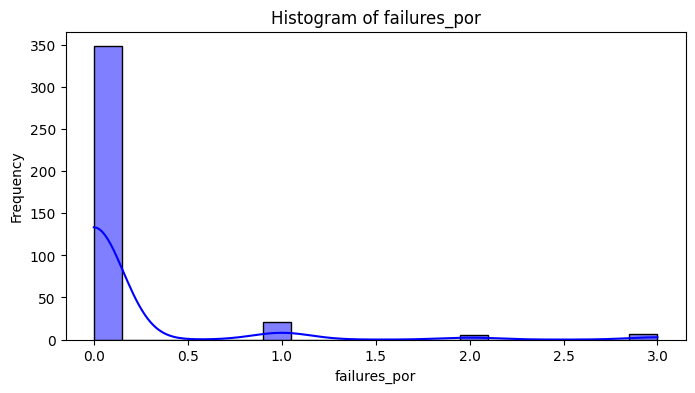

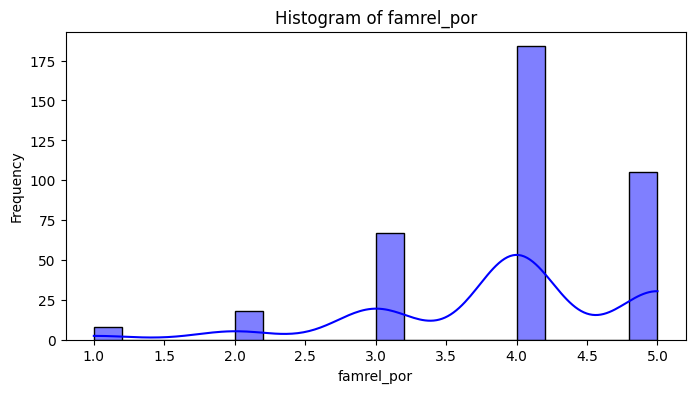

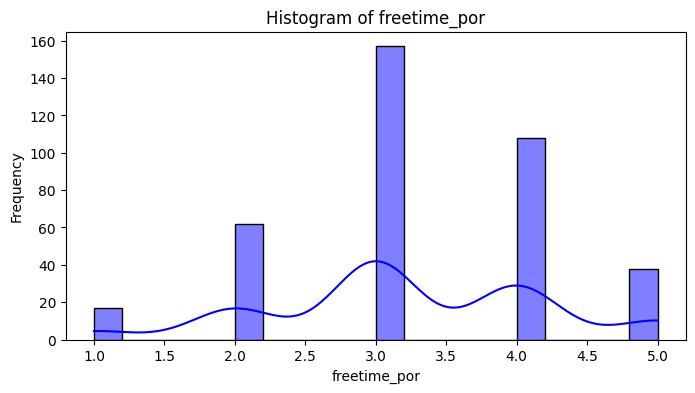

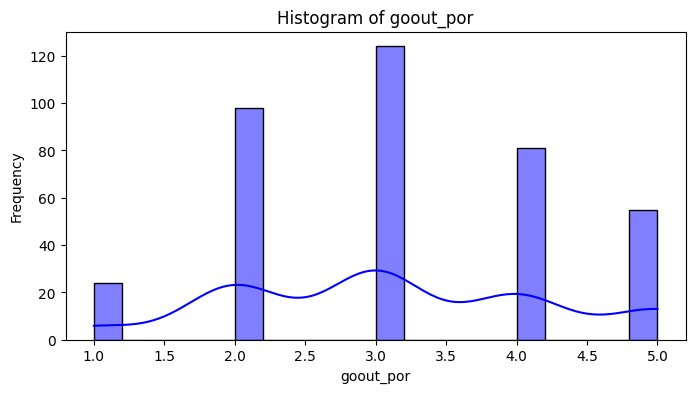

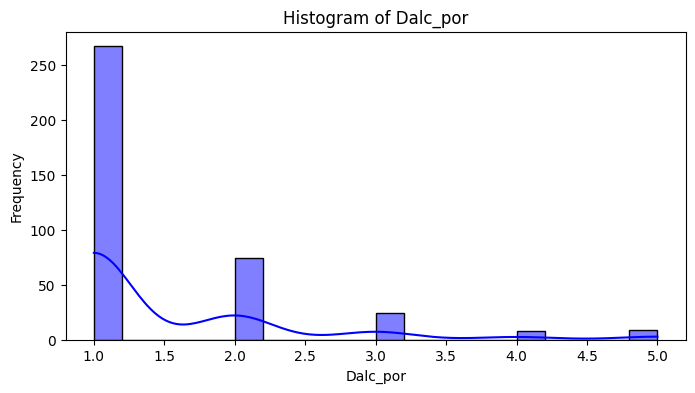

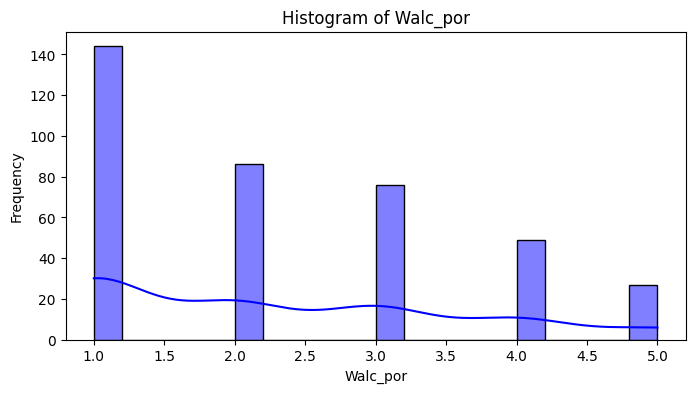

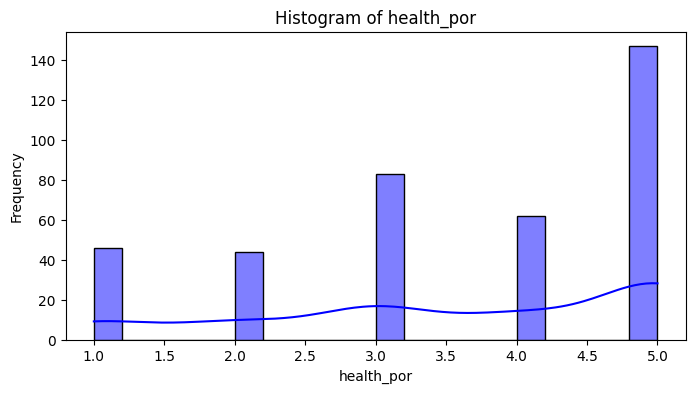

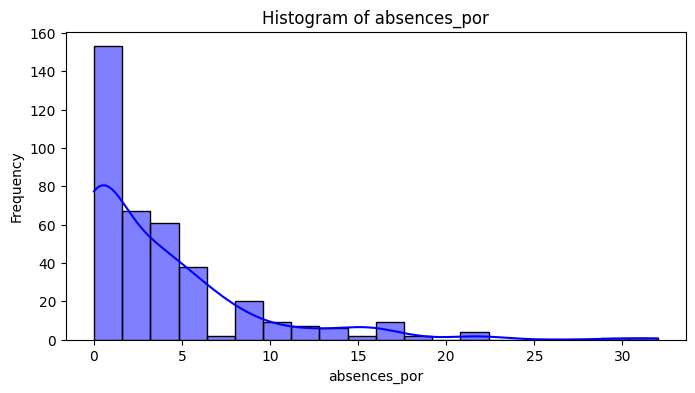

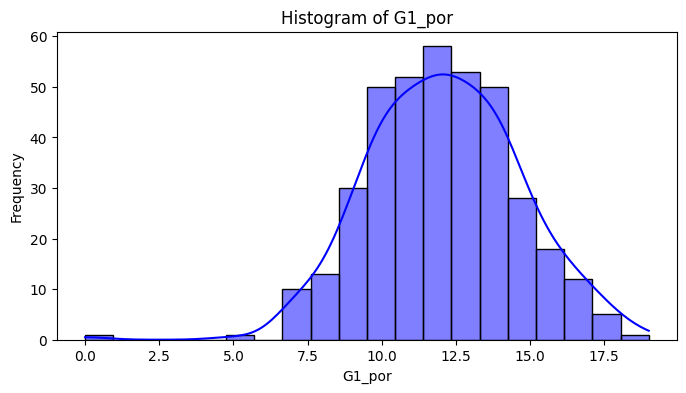

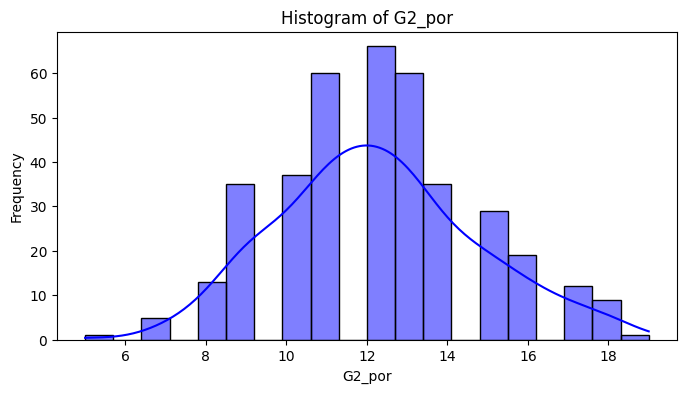

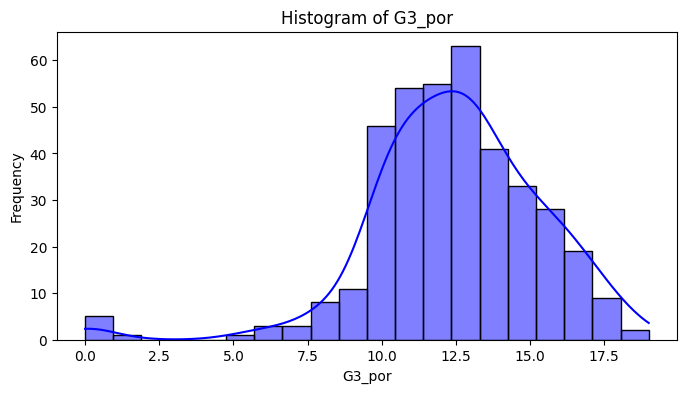

/var/folders/f6/s4dd89s15253_7034mv9vb3h0000gn/T/ipykernel_4704/970744779.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette="viridis")


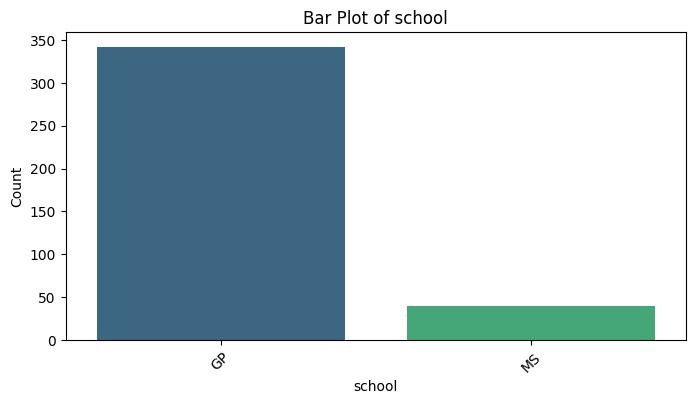

/var/folders/f6/s4dd89s15253_7034mv9vb3h0000gn/T/ipykernel_4704/970744779.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette="viridis")


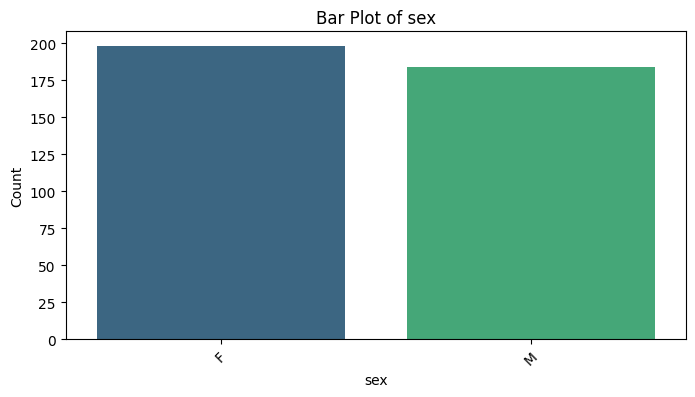

/var/folders/f6/s4dd89s15253_7034mv9vb3h0000gn/T/ipykernel_4704/970744779.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette="viridis")


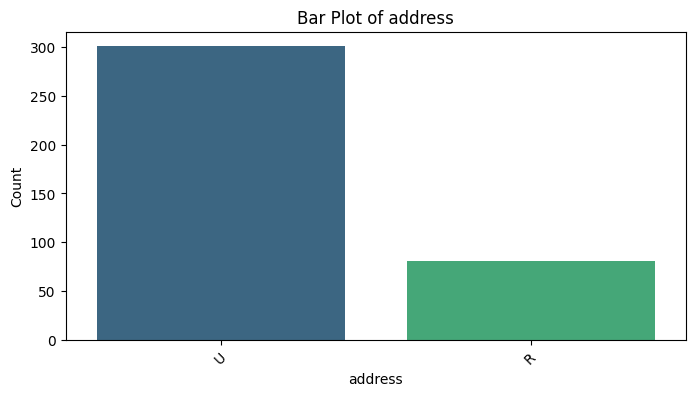

/var/folders/f6/s4dd89s15253_7034mv9vb3h0000gn/T/ipykernel_4704/970744779.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette="viridis")


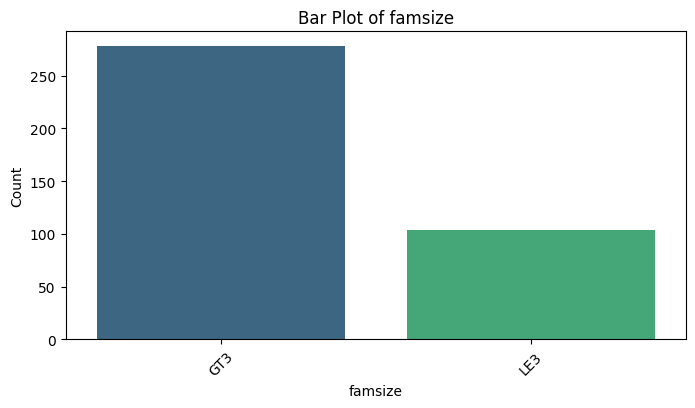

/var/folders/f6/s4dd89s15253_7034mv9vb3h0000gn/T/ipykernel_4704/970744779.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette="viridis")


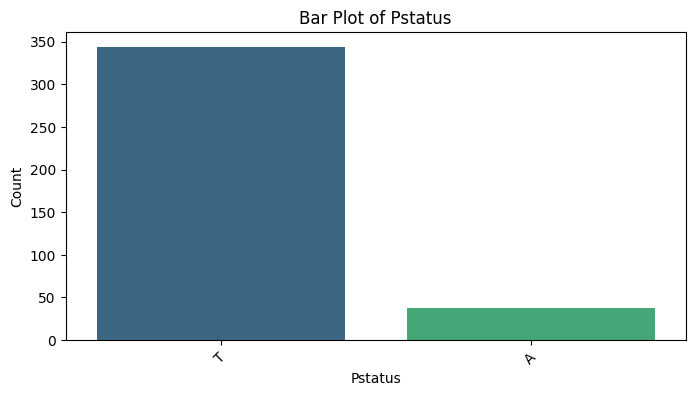

/var/folders/f6/s4dd89s15253_7034mv9vb3h0000gn/T/ipykernel_4704/970744779.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette="viridis")


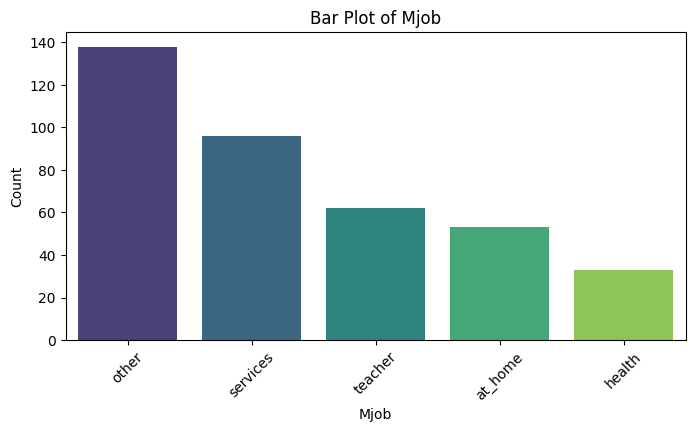

/var/folders/f6/s4dd89s15253_7034mv9vb3h0000gn/T/ipykernel_4704/970744779.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette="viridis")


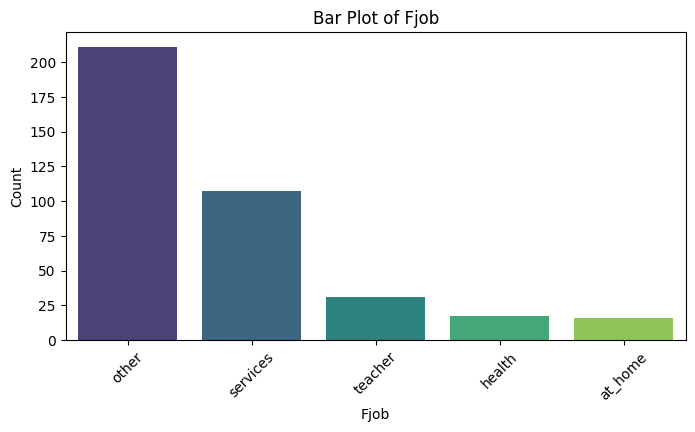

/var/folders/f6/s4dd89s15253_7034mv9vb3h0000gn/T/ipykernel_4704/970744779.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette="viridis")


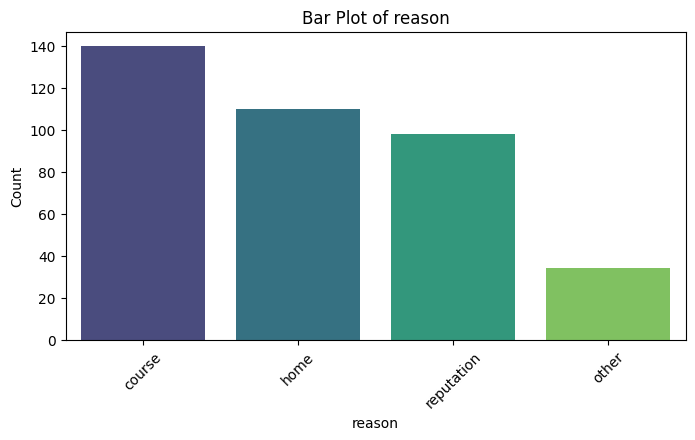

/var/folders/f6/s4dd89s15253_7034mv9vb3h0000gn/T/ipykernel_4704/970744779.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette="viridis")


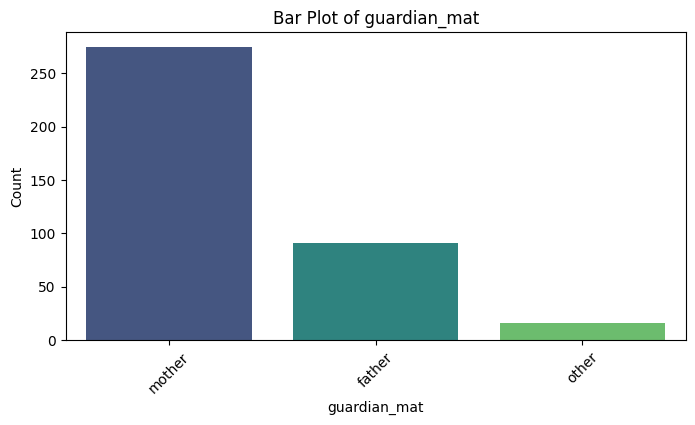

/var/folders/f6/s4dd89s15253_7034mv9vb3h0000gn/T/ipykernel_4704/970744779.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette="viridis")


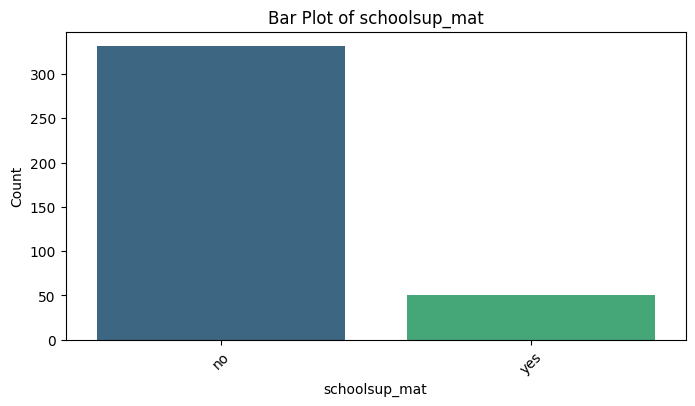

/var/folders/f6/s4dd89s15253_7034mv9vb3h0000gn/T/ipykernel_4704/970744779.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette="viridis")


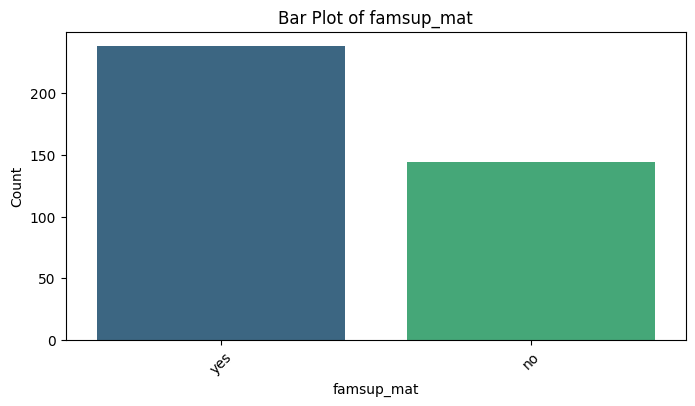

/var/folders/f6/s4dd89s15253_7034mv9vb3h0000gn/T/ipykernel_4704/970744779.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette="viridis")


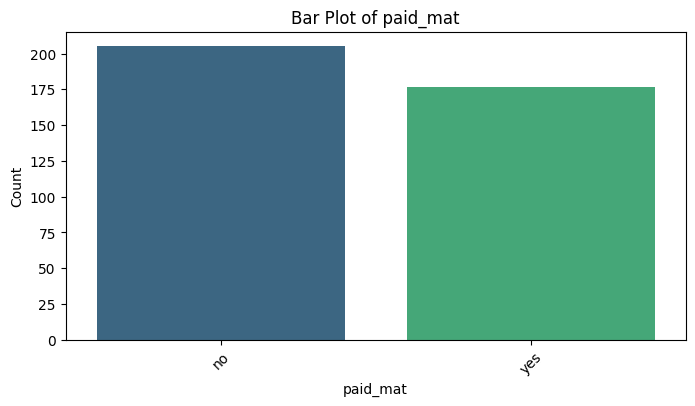

/var/folders/f6/s4dd89s15253_7034mv9vb3h0000gn/T/ipykernel_4704/970744779.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette="viridis")


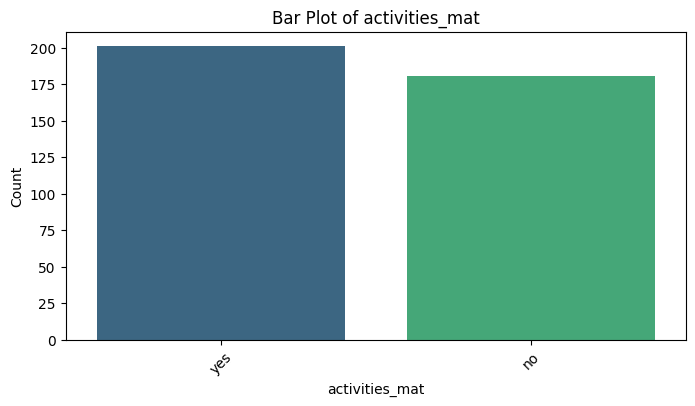

/var/folders/f6/s4dd89s15253_7034mv9vb3h0000gn/T/ipykernel_4704/970744779.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette="viridis")


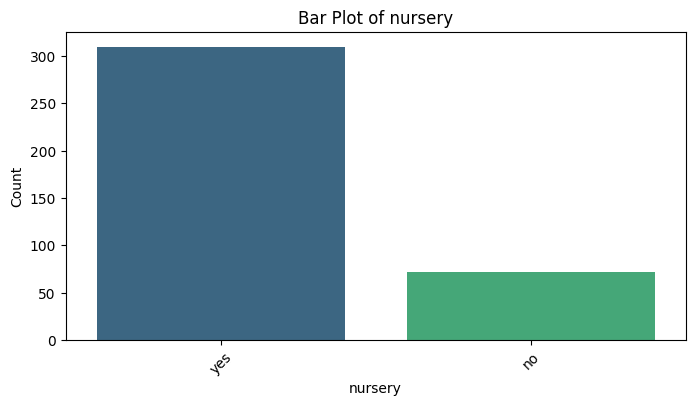

/var/folders/f6/s4dd89s15253_7034mv9vb3h0000gn/T/ipykernel_4704/970744779.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette="viridis")


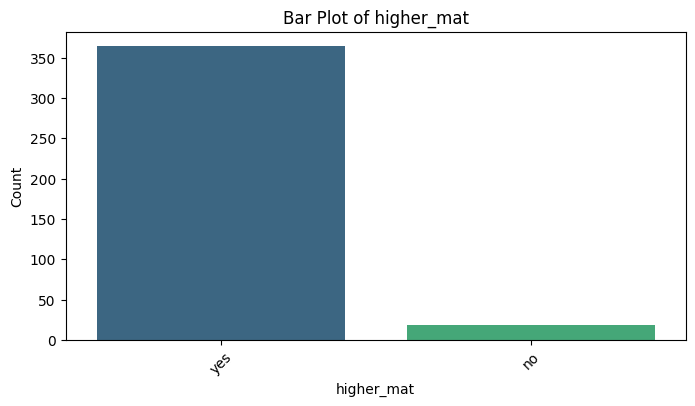

/var/folders/f6/s4dd89s15253_7034mv9vb3h0000gn/T/ipykernel_4704/970744779.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette="viridis")


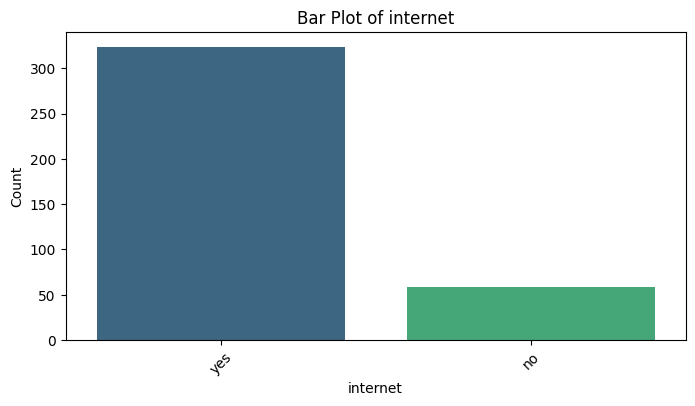

/var/folders/f6/s4dd89s15253_7034mv9vb3h0000gn/T/ipykernel_4704/970744779.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette="viridis")


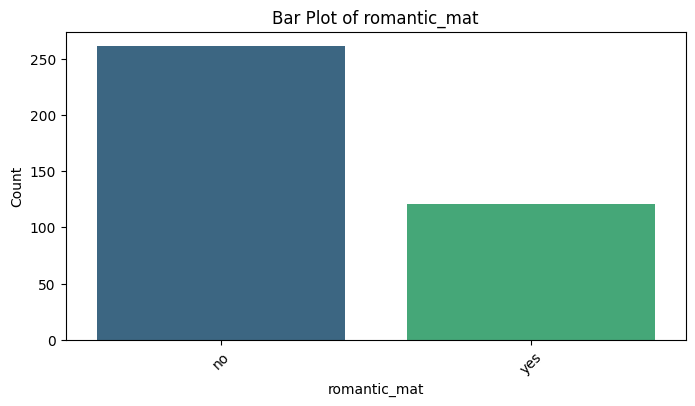

/var/folders/f6/s4dd89s15253_7034mv9vb3h0000gn/T/ipykernel_4704/970744779.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette="viridis")


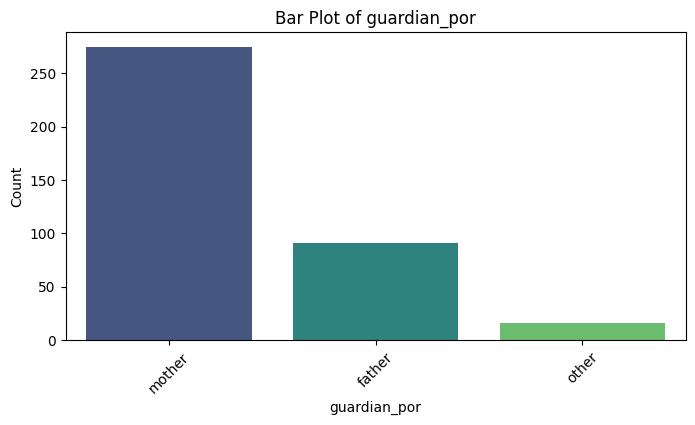

/var/folders/f6/s4dd89s15253_7034mv9vb3h0000gn/T/ipykernel_4704/970744779.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette="viridis")


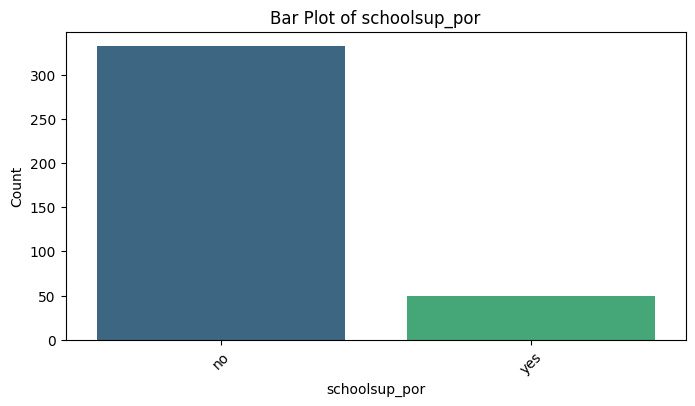

/var/folders/f6/s4dd89s15253_7034mv9vb3h0000gn/T/ipykernel_4704/970744779.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette="viridis")


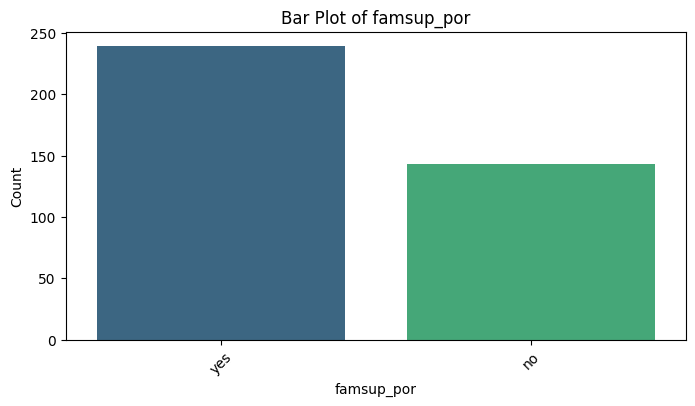

/var/folders/f6/s4dd89s15253_7034mv9vb3h0000gn/T/ipykernel_4704/970744779.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette="viridis")


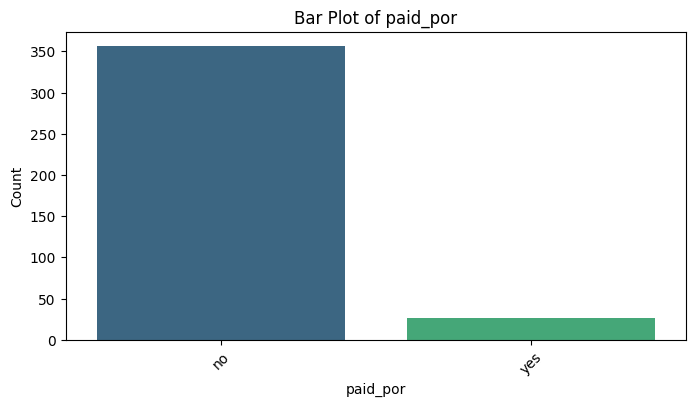

/var/folders/f6/s4dd89s15253_7034mv9vb3h0000gn/T/ipykernel_4704/970744779.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette="viridis")


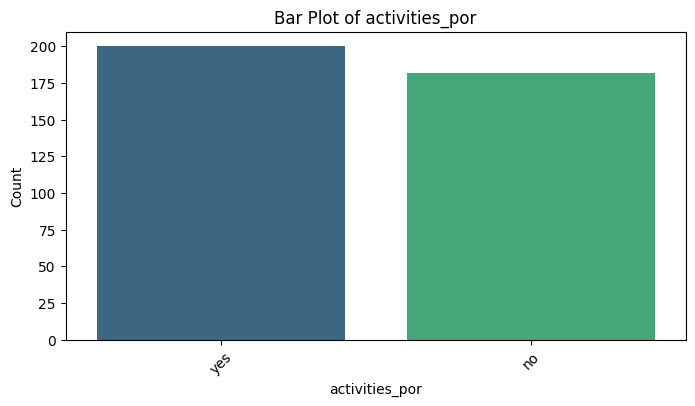

/var/folders/f6/s4dd89s15253_7034mv9vb3h0000gn/T/ipykernel_4704/970744779.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette="viridis")


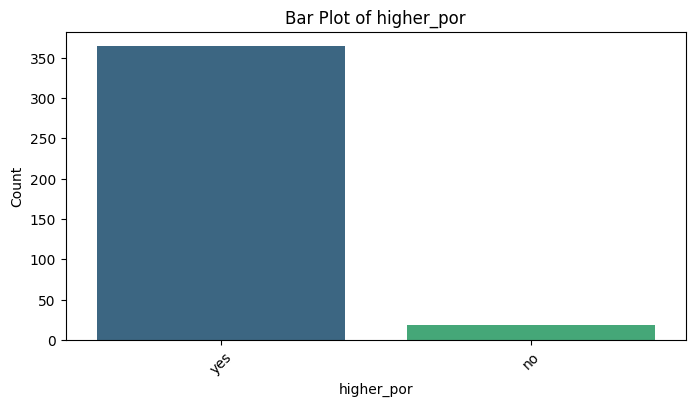

/var/folders/f6/s4dd89s15253_7034mv9vb3h0000gn/T/ipykernel_4704/970744779.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette="viridis")


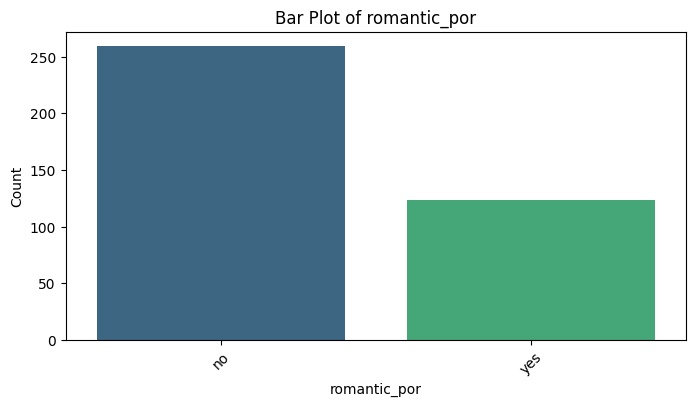

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

def generate_complete_data_quality_report(df, target_feature=None):
    """
    Generate a comprehensive data quality report for a given DataFrame.
    
    Parameters:
    - df: pandas DataFrame, the dataset to analyze.
    - target_feature: str, the name of the target feature (optional) for special focus.
    
    Returns:
    - data_quality_report: pandas DataFrame with key insights.
    """
    # Tabular Report: Basic Statistics
    data_quality_report = pd.DataFrame({
        "Column Name": df.columns,
        "Data Type": df.dtypes.values,
        "Number of Unique Values": df.nunique().values,
        "Number of Missing Values": df.isnull().sum().values,
        "Percentage of Missing Values (%)": (df.isnull().sum() / len(df) * 100).values,
        "Mean": [df[col].mean() if df[col].dtype in ['int64', 'float64'] else None for col in df.columns],
        "Median": [df[col].median() if df[col].dtype in ['int64', 'float64'] else None for col in df.columns],
        "Standard Deviation": [df[col].std() if df[col].dtype in ['int64', 'float64'] else None for col in df.columns],
        "Minimum": [df[col].min() if df[col].dtype in ['int64', 'float64'] else None for col in df.columns],
        "Maximum": [df[col].max() if df[col].dtype in ['int64', 'float64'] else None for col in df.columns],
        "Top Value (Mode)": [df[col].mode()[0] if not df[col].mode().empty else None for col in df.columns],
        "Frequency of Top Value": [df[col].value_counts().iloc[0] if not df[col].value_counts().empty else None for col in df.columns]
    })

    # Save report to CSV
    data_quality_report.to_csv("data_quality_report.csv", index=False)
    print("Data Quality Report saved as 'data_quality_report.csv'.")

    # Outlier Detection
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
    outlier_report = {}
    for col in numeric_columns:
        z_scores = zscore(df[col].dropna())
        outlier_count = np.sum(np.abs(z_scores) > 3)
        outlier_report[col] = outlier_count
    print("\nOutlier Counts per Numeric Feature:")
    print(outlier_report)

    # Visualizations: Histograms for Continuous Features
    for feature in numeric_columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[feature], kde=True, bins=20, color='blue')
        plt.title(f"Histogram of {feature}")
        plt.xlabel(feature)
        plt.ylabel("Frequency")
        plt.show()

    # Visualizations: Bar Plots for Categorical Features
    categorical_columns = df.select_dtypes(include=['object']).columns
    for feature in categorical_columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette="viridis")
        plt.title(f"Bar Plot of {feature}")
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()

    # Target Feature Analysis
    if target_feature and target_feature in df.columns:
        print(f"\nClass Distribution for Target Feature ({target_feature}):")
        print(df[target_feature].value_counts(normalize=True))
        plt.figure(figsize=(8, 4))
        sns.histplot(df[target_feature], kde=True, color='green')
        plt.title(f"Distribution of Target Feature: {target_feature}")
        plt.xlabel(target_feature)
        plt.ylabel("Frequency")
        plt.show()

    return data_quality_report, outlier_report

# Example Usage
target_feature = 'g3'
data_quality_report, outlier_report = generate_complete_data_quality_report(merged_data, target_feature=target_feature)

### Data Cleaning

In [11]:
# Resolve Duplicate Columns
columns_to_keep = [
    'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 
    'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet',
    'guardian_mat', 'traveltime_mat', 'studytime_mat', 'failures_mat', 'schoolsup_mat', 
    'famsup_mat', 'paid_mat', 'activities_mat', 'higher_mat', 'romantic_mat', 
    'famrel_mat', 'freetime_mat', 'goout_mat', 'Dalc_mat', 'Walc_mat', 'health_mat', 
    'absences_mat', 'G1_mat', 'G2_mat', 'G3_mat'
]

# Retain the '_mat' versions and rename columns to remove suffix
merged_data = merged_data[columns_to_keep]
merged_data.columns = [col.replace('_mat', '') for col in merged_data.columns]

# Standardize Column Names
merged_data.columns = merged_data.columns.str.lower().str.strip().str.replace(' ', '_').str.replace('-', '_')
print("Standardized column names:")
print(merged_data.columns.tolist())

# Handle Missing Values
# Fill numeric columns with the median
numeric_columns = merged_data.select_dtypes(include=['int64', 'float64']).columns
merged_data[numeric_columns] = merged_data[numeric_columns].fillna(merged_data[numeric_columns].median())

# Fill categorical columns with the mode
categorical_columns = merged_data.select_dtypes(include=['object']).columns
merged_data[categorical_columns] = merged_data[categorical_columns].fillna(merged_data[categorical_columns].mode().iloc[0])

# Remove Duplicates
duplicates = merged_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

merged_data.drop_duplicates(inplace=True)
print(f"Shape after removing duplicates: {merged_data.shape}")

# Remove Invalid Entries
# Remove invalid or implausible entries for age and G3
merged_data = merged_data[(merged_data['age'] >= 15) & (merged_data['age'] <= 22)]
merged_data = merged_data[(merged_data['g3'] >= 0) & (merged_data['g3'] <= 20)]
print("Shape after removing invalid entries:", merged_data.shape)

# Consolidate Redundant Features
# Combine guardian_mat and guardian_por (if both exist)
if 'guardian_mat' in merged_data.columns and 'guardian_por' in merged_data.columns:
    merged_data['guardian'] = merged_data[['guardian_mat', 'guardian_por']].mode(axis=1)[0]
    merged_data.drop(columns=['guardian_mat', 'guardian_por'], inplace=True)

print("Shape after consolidating redundant features:", merged_data.shape)

# Validate Data Consistency
# Standardize categorical values
if 'school' in merged_data.columns:
    print("Unique values in 'school':", merged_data['school'].unique())
    merged_data['school'] = merged_data['school'].str.upper()

# Remove Outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

columns_to_check = ['absences', 'g1', 'g2', 'g3']
for col in columns_to_check:
    merged_data = remove_outliers(merged_data, col)

# Verify Final Dataset
print("Final dataset shape:", merged_data.shape)
print("Sample data after cleaning:")
print(merged_data.head())

# Save the Cleaned Dataset
merged_data.to_csv("student-merged-cleaned.csv", index=False)
print("Cleaned dataset saved to 'student-merged-cleaned.csv'.")

Standardized column names:
['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu', 'mjob', 'fjob', 'reason', 'nursery', 'internet', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'higher', 'romantic', 'famrel', 'freetime', 'goout', 'dalc', 'walc', 'health', 'absences', 'g1', 'g2', 'g3']
Number of duplicate rows: 12
Shape after removing duplicates: (370, 33)
Shape after removing invalid entries: (370, 33)
Shape after consolidating redundant features: (370, 33)
Unique values in 'school': ['GP' 'MS']
Final dataset shape: (323, 33)
Sample data after cleaning:
  school sex  age address famsize pstatus  medu  fedu     mjob      fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4

### Derived/Created Features

In [12]:
# Derived/Created Features

# 1. Average Early Grades (G1 and G2)
merged_data['avg_early_grades'] = (merged_data['g1'] + merged_data['g2']) / 2

# 2. Combined Parental Education
merged_data['parental_education'] = (merged_data['medu'] + merged_data['fedu']) / 2

# 3. Total Alcohol Consumption
merged_data['total_alcohol'] = merged_data['dalc'] + merged_data['walc']

# 4. High Absenteeism
median_absences = merged_data['absences'].median()
merged_data['high_absences'] = merged_data['absences'].apply(lambda x: 1 if x > median_absences else 0)

# 5. Failures Weighted by Study Time
merged_data['failure_study_ratio'] = merged_data['failures'] / (merged_data['studytime'] + 1)

# 6. Early Grade Improvement
merged_data['grade_improvement'] = merged_data['g2'] - merged_data['g1']

# 7. Weekend vs Weekday Alcohol Ratio
merged_data['alc_ratio'] = merged_data['walc'] / (merged_data['dalc'] + 1)

# Verify the new features
print("Sample data with new features:")
print(merged_data[['avg_early_grades', 'parental_education', 'total_alcohol', 'high_absences', 
                   'failure_study_ratio', 'grade_improvement', 'alc_ratio']].head())

Sample data with new features:
   avg_early_grades  parental_education  total_alcohol  high_absences  \
0               5.5                 4.0              2              1   
1               5.0                 1.0              2              0   
2               7.5                 1.0              5              1   
3              14.5                 3.0              2              0   
4               8.0                 3.0              3              0   

   failure_study_ratio  grade_improvement  alc_ratio  
0                  0.0                  1        0.5  
1                  0.0                  0        0.5  
2                  1.0                  1        1.0  
3                  0.0                 -1        0.5  
4                  0.0                  4        1.0  


### Data Normalization

In [13]:
# Select numeric columns
numeric_columns = merged_data.select_dtypes(include=['int64', 'float64']).columns

# Create pipelines for both scaling methods
def preprocess_data(data, scaler):
    """
    Function to preprocess data using the specified scaler.
    
    Parameters:
    - data: pandas DataFrame, the dataset to scale.
    - scaler: Scikit-learn scaler object (e.g., StandardScaler, RobustScaler).
    
    Returns:
    - scaled_data: pandas DataFrame, the scaled dataset.
    """
    scaled_data = data.copy()
    scaled_data[numeric_columns] = scaler.fit_transform(scaled_data[numeric_columns])
    return scaled_data

# Preprocess using Z-Score Normalization
zscore_scaler = StandardScaler()
zscore_data = preprocess_data(merged_data, zscore_scaler)
print("Z-Score Normalized Data Sample:")
print(zscore_data.head())

# Preprocess using Robust Scaling
robust_scaler = RobustScaler()
robust_data = preprocess_data(merged_data, robust_scaler)
print("Robust Scaled Data Sample:")
print(robust_data.head())

# Save preprocessed datasets for future use
zscore_data.to_csv("student-zscore-normalized.csv", index=False)
robust_data.to_csv("student-robust-scaled.csv", index=False)

print("Preprocessed datasets saved:")
print("- Z-Score Normalized Dataset: 'student-zscore-normalized.csv'")
print("- Robust Scaled Dataset: 'student-robust-scaled.csv'")

Z-Score Normalized Data Sample:
  school sex       age address famsize pstatus      medu      fedu     mjob  \
0     GP   F  1.275153       U     GT3       A  1.082413  1.321009  at_home   
1     GP   F  0.417081       U     GT3       T -1.670495 -1.455689  at_home   
2     GP   F -1.299063       U     LE3       T -1.670495 -1.455689  at_home   
3     GP   F -1.299063       U     GT3       T  1.082413 -0.530123   health   
4     GP   F -0.440991       U     GT3       T  0.164777  0.395443    other   

       fjob  ...        g1        g2        g3 avg_early_grades  \
0   teacher  ... -1.934116 -1.704848 -1.730933        -1.865749   
1     other  ... -1.934116 -2.019695 -1.730933        -2.025346   
2     other  ... -1.317718 -1.075156 -0.495372        -1.227363   
3  services  ...  1.147875  0.813921  1.049079         1.006991   
4     other  ... -1.625917 -0.445464 -0.495372        -1.067766   

   parental_education  total_alcohol  high_absences failure_study_ratio  \
0            1.

## Experimental Design

## Modelling

## Evaluation & Deployment